In [1]:
import numpy as np
import pandas as pd
import scipy
import os
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import functools
from sklearn.datasets import fetch_openml
from fitter import *
from sklearn import decomposition
import matplotlib.ticker as ticker
from TomographyUnitTest import decreasing_error_plot, make_real_predicted_comparison, found_distribution
from sklearn.QuantumUtility.Utility import *

In [407]:
!pip install fitter


  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25013 sha256=a4337a418bc41a5e357a31573422e53856247467928e46fe8b56c83a0d145d06
  Stored in directory: c:\users\tommaso\appdata\local\pip\cache\wheels\e1\98\16\e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64217 sha256=980e66419bc684065fe7a2a505b58d33105b227417ac70a6e57e51561922e7ef
  Stored in directory: c:\users\tommaso\appdata\local\pip\cache\wheels\82\ab\83\fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [2]:
v = np.load('array784_exp.npy')
v_uni = np.load('array784.npy')
zero = np.load('sparse_arr_20.npy')
zero1 = np.load('sparse_arr_50.npy')
list_=[v,v_uni,zero,zero1]


In [3]:
delta = 0.3

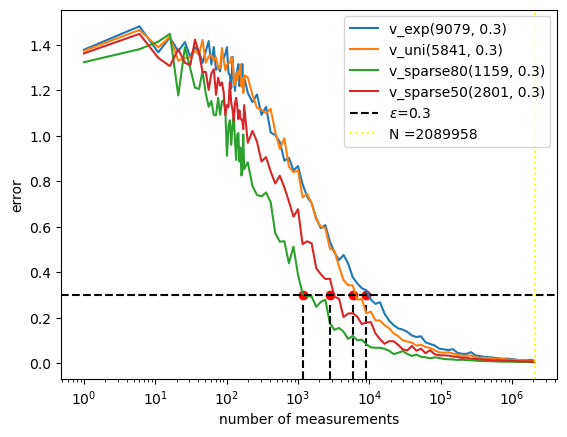

In [6]:
decreasing_error_plot(list_, delta)

# Uniform

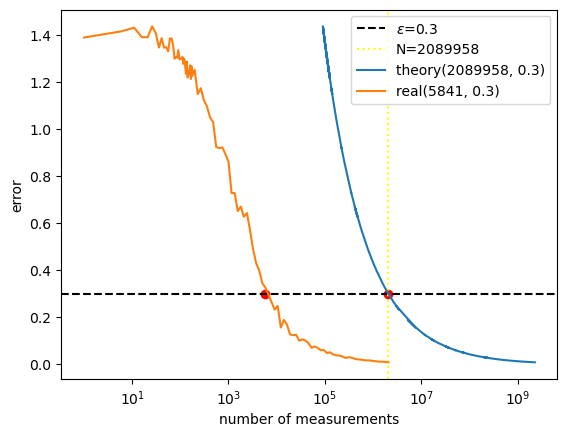

In [4]:
# Theory vs Real for uniform_vector
make_real_predicted_comparison(v_uni, delta,norm = 'L2')

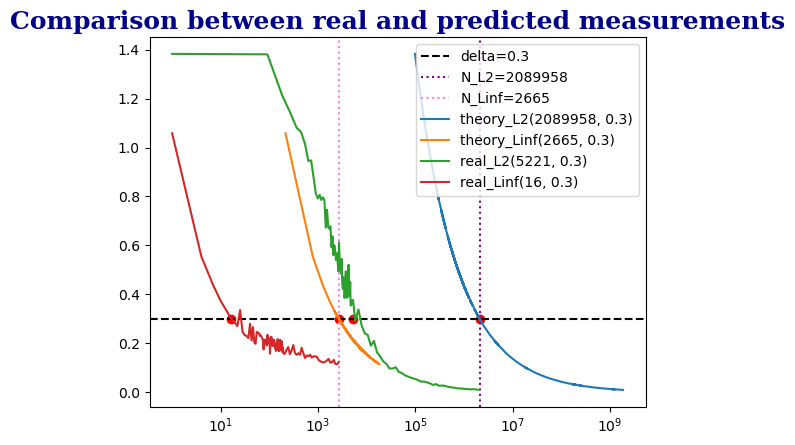

In [5]:
# Theory vs Real for uniform_vector
make_real_predicted_comparison(v_uni, delta,norm='all')

# Exponential

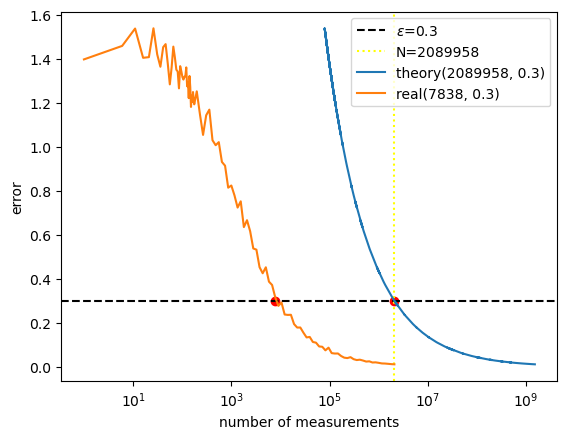

In [5]:
# Theory vs Real for uniform_vector
make_real_predicted_comparison(v, delta,norm = 'L2')

# Sparse vector


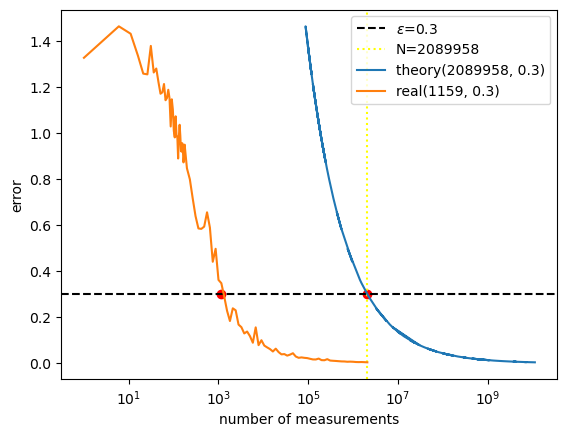

In [6]:
make_real_predicted_comparison(zero, delta)

# Tomography error distribution for uniform vector


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

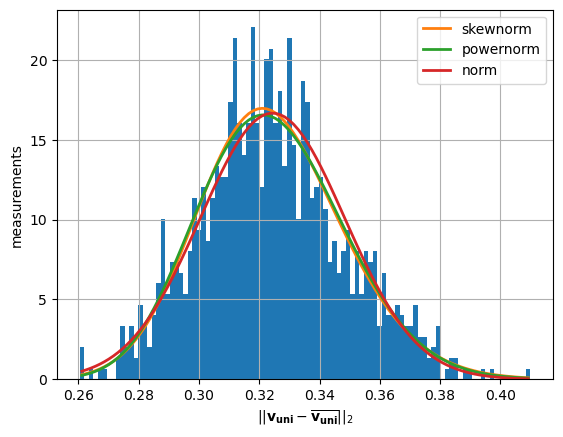

In [4]:
samples1 = found_distribution(vector=v_uni, n_measurements=1000, delta=delta,N=5841,distribution_fitter=True,incremental_measure=False,distributions=['skewnorm','powernorm','norm'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

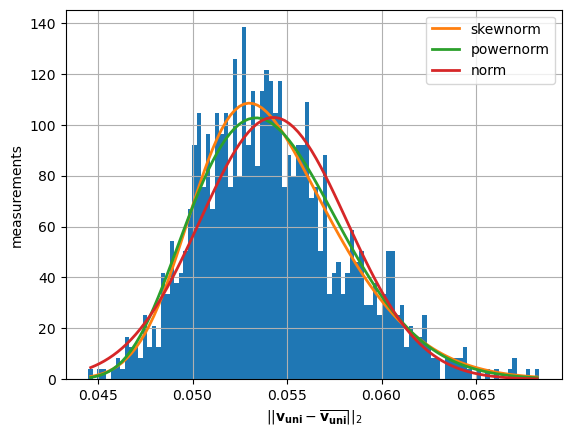

In [5]:
samples1 = found_distribution(vector=v_uni, n_measurements=1000, delta=delta,N=100000,distribution_fitter=True,incremental_measure=False,distributions=['skewnorm','powernorm','norm'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

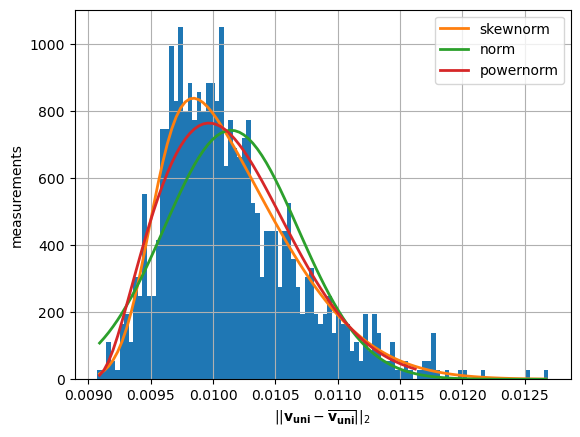

In [7]:
samples1 = found_distribution(vector=v_uni, n_measurements=1000, delta=delta,distribution_fitter=True,incremental_measure=False,distributions=['skewnorm','powernorm','norm'])

# Truncated Gaussian Noise

In [ ]:
samples = []
for i in range(1000):
    # Create a noisy copy
    B = make_noisy_vec(v,noise=0.1)
    print(i)
    # Append the Frobenius norm of A-B to the samples
    samples.append(np.linalg.norm(v - B,ord=2))
    
# Plot the samples
plt.hist(samples, bins=50, color="darkblue")
plt.xlabel(r"$||\mathbf{v} - \overline{\mathbf{v}}||_F$")
plt.ylabel("measurements")
plt.show()

# Tomography test
    

In [6]:
delta = [0.8,0.6,0.5,0.3,0.1]

for d in delta:
    B = np.array(list(L2_tomography(v,delta = d,stop_when_reached_accuracy=True).values())[-1])
    norm = np.linalg.norm(v-B ,ord = 2)
    if norm < d:
        print('delta:',d,'norm:',norm,'ok')

delta: 0.8 norm: 0.6602554157638353 ok
delta: 0.6 norm: 0.4998402973817474 ok
delta: 0.5 norm: 0.45003897361612627 ok
delta: 0.3 norm: 0.284293276313119 ok
delta: 0.1 norm: 0.09359299876932482 ok
